In [2]:
# Library Inclusion
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

C:\Users\Manvendra Raj Singh\AppData\Local\Temp\ipykernel_25544\2515450576.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Variables declaration
bestAccuracy = 0
bestKernel = None
bestC = 0
bestGamma = 0
iteration = 100
kernelList = ['rbf', 'sigmoid', 'poly', 'linear', 'precomputed']

In [4]:
# Loading dataset (Wine Quality)
data = load_wine()
X = data.data
y = data.target

# Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Dividing the dataset into 70/30 for training and testing
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# fitnessFunction declaration
def fitnessFunction(k, c, g):
    # Train the model
    model = SVC(C=c, gamma=g)
    model.fit(X_train_all, y_train_all)
    
    # Prediction
    predicted = model.predict(X_test_all)
    
    # Model Evaluation: Accuracy
    accuracy = np.mean(y_test_all == predicted) * 100
    
    return accuracy

In [7]:
# Program Execution
for i in range(iteration):
    k = np.random.choice(kernelList, 1)[0]
    c = np.random.uniform(0.01, 10.0)  # Generating C within the feasible range
    g = np.random.random()
    accuracy = fitnessFunction(k, c, g)

    if accuracy > bestAccuracy:
        bestKernel = k
        bestC = c
        bestGamma = g
        bestAccuracy = accuracy

    print(f"Iteration {i + 1}: Best Accuracy: {bestAccuracy}, Best Kernel: {bestKernel}, Best C: {bestC}, Best Gamma: {bestGamma}")

Iteration 1: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 2: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 3: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 4: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 5: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 6: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 7: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 8: Best Accuracy: 96.29629629629629, Best Kernel: rbf, Best C: 9.45308927102457, Best Gamma: 0.13941360581340378
Iteration 9: Bes

In [8]:
# 5. Return Best: bestKernel, bestC, bestGamma, bestAccuracy
print(f"Best Kernel: {bestKernel}, Best C: {bestC}, Best Gamma: {bestGamma}, Best Accuracy: {bestAccuracy}")

Best Kernel: rbf, Best C: 8.969792766719355, Best Gamma: 0.10843793919503841, Best Accuracy: 98.14814814814815


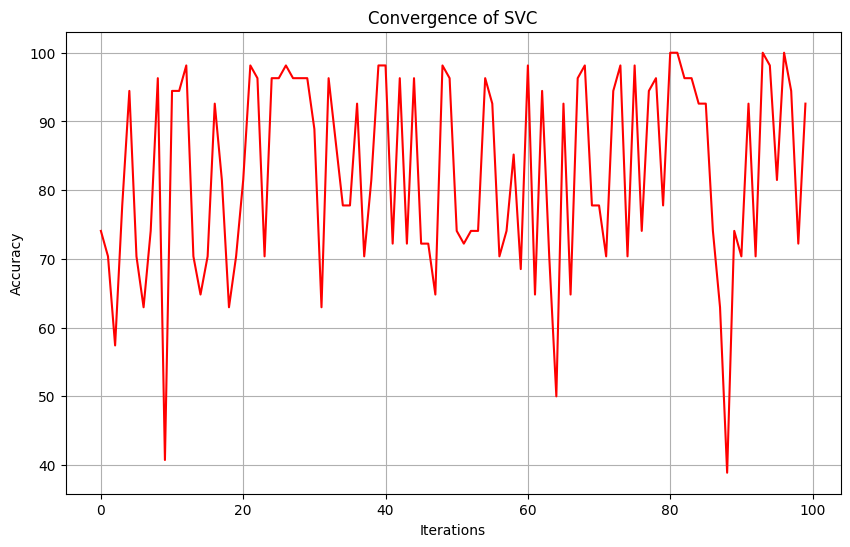

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the convergence graph accuracy vs iterations
convergence = np.zeros(iteration)
for i in range(iteration):
    k = np.random.choice(kernelList, 1)[0]
    c = np.random.uniform(0.01, 10.0)  # Generating C within the feasible range
    g = np.random.random()
    accuracy = fitnessFunction(k, c, g)
    convergence[i] = accuracy

plt.figure(figsize=(10, 6))
plt.plot(np.arange(iteration), convergence,color='red')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Convergence of SVC")
plt.grid(True)
plt.show()
plt.savefig('graph.png')